# PyStan Practice
## Linear Regression

Christa Caggiano, Zaitlen Lab, Dec 2018 


**Sources:** https://towardsdatascience.com/an-introduction-to-bayesian-inference-in-pystan-c27078e58d53

### Imports

In [1]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Generation

In [2]:
# number of points to generate 

n = 100

In [3]:
# generate x values that are random numbers between 0 and 1 

x = np.random.rand(n)

In [4]:
# generate y's from y = mx + b 

m = 1 
b = 0.1 
error = 0.1

y = np.random.normal((m*x)+b, error)

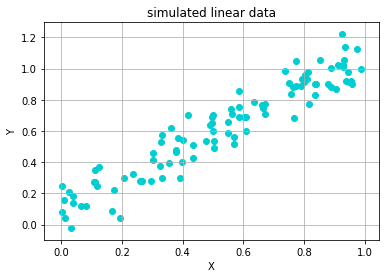

In [5]:
# plot data to ensure linear relationship 

plt.scatter(x, y, color="darkturquoise")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("simulated linear data")
plt.grid(True)

plt.show()

### Define PyStan model 

In [6]:
# define model 

linear_regression = """
data {
    # input to model fitting 
    int<lower=0> N; // number of points, must be greater than 0 
    vector[N] x; // x values
    vector[N] y; // y values 
}
parameters {
    # parameters to estimate 
    real m; // real number   
    real b; // real number 
    real<lower=0> error; // must be > 0 
}
model {
    y ~ normal((m*x) + b, error); // model w/ normal distribution 
}
"""

### Compile model 

In [7]:
# compile model, may take a few seconds 

lr1 = pystan.StanModel(model_code=linear_regression)  # linear regression model 1 

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_de4dbaf2649647f0b3d4bb71095bcb9a NOW.
/Users/Christa.Caggiano/miniconda3/envs/stan/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/m4/h85zk1hs5kzcdnmhsppglh2m0000gn/T/tmpohqdm26j/stanfit4anon_model_de4dbaf2649647f0b3d4bb71095bcb9a_6347261662404069191.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


### Fit model 

In [23]:
data = {'N': n, 'x': x, 'y': y}  # input the simulated data as a dictionary 

# fit model
# data dictionary
# 1,000 iterations- number of steps of model 
# 4 chains to run simultaneously- limit of macbook, could be 
# 500 warmups- number of iterations for MCMC to stabilize, are discarded after 

fit1 = lr1.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)  

In [24]:
m_est = fit1['m']
b_est = fit1['b']
error_est = fit1['error']

### Summarize

In [25]:
summary_dict1 = fit1.summary()
summary1 = pd.DataFrame(summary_dict1["summary"], columns=summary_dict1["summary_colnames"], index=summary_dict1["summary_rownames"])

In [26]:
b_mean, m_mean, error_mean = summary1["mean"]["b"], summary1["mean"]["m"], summary1["mean"]["error"]
b_upper, b_lower = summary1["2.5%"]["b"], summary1["97.5%"]["b"]
m_upper, m_lower = summary1["2.5%"]["m"], summary1["97.5%"]["m"]

In [27]:
m_err = m_mean - m
b_err = b_mean - b
e_err = error_mean - error

avg_error = (m_err + b_err + e_err)/3
print(avg_error)

-0.0072297965272583725


### Plot

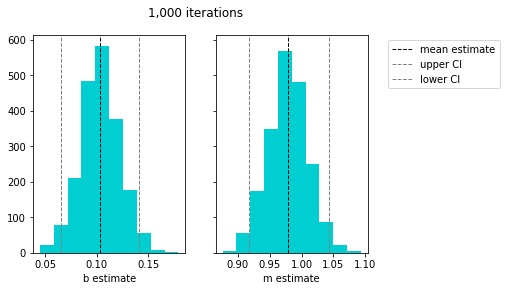

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].hist(b_est, color="darkturquoise")
axes[0].axvline(b_est.mean(), color="black", linestyle="dashed", linewidth=1, label="b mean estimate")
axes[0].axvline(b_upper, color="grey", linestyle="dashed", linewidth=1, label="upper CI")
axes[0].axvline(b_lower, color="grey", linestyle="dashed", linewidth=1, label="lower CI")
axes[0].set_xlabel("b estimate")

axes[1].hist(m_est, color="darkturquoise")
axes[1].axvline(m_est.mean(), color="black", linestyle="dashed", linewidth=1, label="mean estimate")
axes[1].axvline(m_upper, color="grey", linestyle="dashed", linewidth=1, label="upper CI")
axes[1].axvline(m_lower, color="grey", linestyle="dashed", linewidth=1, label="lower CI")
axes[1].set_xlabel("m estimate")
axes[1].legend(loc=9, bbox_to_anchor=(1.5, 1))

fig.suptitle("1,000 iterations posterior distribution")
plt.show()

### Fit with more iterations

In [14]:
# increase the number of iterations by 100x, warmup is 20% 

fit2 = lr1.sampling(data=data, iter=100000, chains=4, warmup=5000, thin=1, seed=101)  

### Re-summarize

In [16]:
m_est, b_est = fit2['m'], fit2['b']
error_est = fit2['error']

summary_dict2 = fit2.summary()
summary2 = pd.DataFrame(summary_dict2["summary"], columns=summary_dict2["summary_colnames"], index=summary_dict2["summary_rownames"])

In [17]:
b_mean, m_mean, error_mean = summary2["mean"]["b"], summary2["mean"]["m"], summary2["mean"]["error"]
b_upper, b_lower = summary2["2.5%"]["b"], summary2["97.5%"]["b"]
m_upper, m_lower = summary2["2.5%"]["m"], summary2["97.5%"]["m"]

In [22]:
m_err = m_mean - m
b_err = b_mean - b
e_err = error_mean - error

avg_error = (m_err + b_err + e_err)/3
print(avg_error)

-0.00753899064972952


### Re-plot

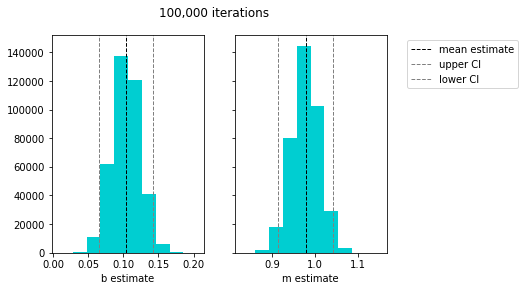

In [19]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].hist(b_est, color="darkturquoise")
axes[0].axvline(b_est.mean(), color="black", linestyle="dashed", linewidth=1, label="b mean estimate")
axes[0].axvline(b_upper, color="grey", linestyle="dashed", linewidth=1, label="upper CI")
axes[0].axvline(b_lower, color="grey", linestyle="dashed", linewidth=1, label="lower CI")
axes[0].set_xlabel("b estimate")

axes[1].hist(m_est, color="darkturquoise")
axes[1].axvline(m_est.mean(), color="black", linestyle="dashed", linewidth=1, label="mean estimate")
axes[1].axvline(m_upper, color="grey", linestyle="dashed", linewidth=1, label="upper CI")
axes[1].axvline(m_lower, color="grey", linestyle="dashed", linewidth=1, label="lower CI")
axes[1].set_xlabel("m estimate")
axes[1].legend(loc=9, bbox_to_anchor=(1.5, 1))

fig.suptitle("100,000 iterations posterior distribution")
plt.show()

Interestingly, 100,000 iterations is not more accurate than 1,000? 


**1,000 iterations error:** 0.007


**100,000 iterations error:** 0.008 
